## Part A: Data Analysis with IMDB Movie Data

Step 1: Import Libraries and Load Dataset

In [47]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [48]:
# Load the dataset
dataset_path = 'IMDB-Movie-Data.csv'
data = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


Step 2: View Basic Information

In [49]:
# View the first 5 rows
data.head()

# Get basic information about the dataset
data.info()

# Get a statistical summary of the dataset
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


Step 3: Data Selection - Indexing and Slicing

In [50]:
# Select a column (Genre) as a Series
genre_series = data['Genre']
print(genre_series)

0       Action,Adventure,Sci-Fi
1      Adventure,Mystery,Sci-Fi
2               Horror,Thriller
3       Animation,Comedy,Family
4      Action,Adventure,Fantasy
                 ...           
995         Crime,Drama,Mystery
996                      Horror
997         Drama,Music,Romance
998            Adventure,Comedy
999       Comedy,Family,Fantasy
Name: Genre, Length: 1000, dtype: object


In [51]:
# Select multiple columns to create a DataFrame
some_cols = data[['Title', 'Genre', 'Actors', 'Director', 'Rating']]
print(some_cols.head())

                     Title                     Genre  \
0  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1               Prometheus  Adventure,Mystery,Sci-Fi   
2                    Split           Horror,Thriller   
3                     Sing   Animation,Comedy,Family   
4            Suicide Squad  Action,Adventure,Fantasy   

                                              Actors              Director  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...            James Gunn   
1  Noomi Rapace, Logan Marshall-Green, Michael Fa...          Ridley Scott   
2  James McAvoy, Anya Taylor-Joy, Haley Lu Richar...    M. Night Shyamalan   
3  Matthew McConaughey,Reese Witherspoon, Seth Ma...  Christophe Lourdelet   
4  Will Smith, Jared Leto, Margot Robbie, Viola D...            David Ayer   

   Rating  
0     8.1  
1     7.0  
2     7.3  
3     7.2  
4     6.2  


In [52]:
# Slice rows from index 10 to 15 and select specific columns
data.iloc[10:15][['Title', 'Rating', 'Revenue (Millions)']]


,Title,Rating,Revenue (Millions)
10,Fantastic Beasts and Where to Find Them,7.5,234.02
11,Hidden Figures,7.8,169.27
12,Rogue One,7.9,532.17
13,Moana,7.7,248.75
14,Colossal,6.4,2.87


Step 4: Conditional Filtering

In [53]:
# Filter data based on conditions (Year between 2010-2015, Rating < 6, Revenue in the top 5%)
filtered_data = data[
    (data['Year'] >= 2010) &
    (data['Year'] <= 2015) &
    (data['Rating'] < 6.0) &
    (data['Revenue (Millions)'] > data['Revenue (Millions)'].quantile(0.95))
]
filtered_data


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
941,942,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy",As a string of mysterious killings grips Seatt...,David Slade,"Kristen Stewart, Robert Pattinson, Taylor Laut...",2010,124,4.9,192740,300.52,58.0


Step 5: Groupby Operation

In [54]:
# Find average rating by Director
director_rating = data.groupby('Director')[['Rating']].mean()
director_rating.head()


,Rating
Director,
Aamir Khan,8.5
Abdellatif Kechiche,7.8
Adam Leon,6.5
Adam McKay,7.0
Adam Shankman,6.3


Step 6: Sorting


In [55]:
# Find top 5 directors with the highest average rating
top_directors = data.groupby('Director')[['Rating']].mean().sort_values(by='Rating', ascending=False).head()
top_directors


,Rating
Director,
Nitesh Tiwari,8.80
Christopher Nolan,8.68
Olivier Nakache,8.60
Makoto Shinkai,8.60
Aamir Khan,8.50


Step 7: Handle Missing Values

In [56]:
# View missing values
data.isnull().sum()

# Drop columns with missing values
data_dropped = data.drop('Metascore', axis=1)
data_dropped.head()

# Fill missing values with the mean of the column
revenue_mean = data['Revenue (Millions)'].mean()
data['Revenue (Millions)'].fillna(revenue_mean, inplace=True)
data.head()


C:\Users\huy\AppData\Local\Temp\ipykernel_2840\2140636202.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Revenue (Millions)'].fillna(revenue_mean, inplace=True)


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


Step 8: Apply Functions

In [57]:
# Classify movies based on their ratings
def rating_group(rating):
    if rating >= 7.5:
        return 'Good'
    elif rating >= 6.0:
        return 'Average'
    else:
        return 'Bad'

data['Rating_category'] = data['Rating'].apply(rating_group)
data[['Title', 'Director', 'Rating', 'Rating_category']].head()


,Title,Director,Rating,Rating_category
0,Guardians of the Galaxy,James Gunn,8.1,Good
1,Prometheus,Ridley Scott,7.0,Average
2,Split,M. Night Shyamalan,7.3,Average
3,Sing,Christophe Lourdelet,7.2,Average
4,Suicide Squad,David Ayer,6.2,Average


## Part B: Data Analysis with Time Series Data

Step 1: Load Time Series Dataset

In [58]:
# Load the OPSD Germany daily dataset
dataset_path = 'opsd_germany_daily.csv'
opsd_daily = pd.read_csv(dataset_path, index_col=0, parse_dates=True)

# Add columns for Year, Month, and Weekday
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday Name'] = opsd_daily.index.day_name()

# Display random rows from the dataset
opsd_daily.sample(5, random_state=0)


,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


Step 2: Time-based Indexing

In [59]:
# Slice data from specific dates
opsd_daily.loc['2014-01-20':'2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,Monday
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,Tuesday
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,Wednesday


In [60]:


# Slice data using partial string indexing
opsd_daily.loc['2012-02']


,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,Wednesday
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,Thursday
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,Friday
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,Saturday
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,Sunday
2012-02-06,1574.766,34.896,55.389,90.285,2012,2,Monday
2012-02-07,1615.078,100.312,19.867,120.179,2012,2,Tuesday
2012-02-08,1613.774,93.763,36.930,130.693,2012,2,Wednesday
2012-02-09,1591.532,132.219,19.042,151.261,2012,2,Thursday


Step 3: Visualize Time Series Data

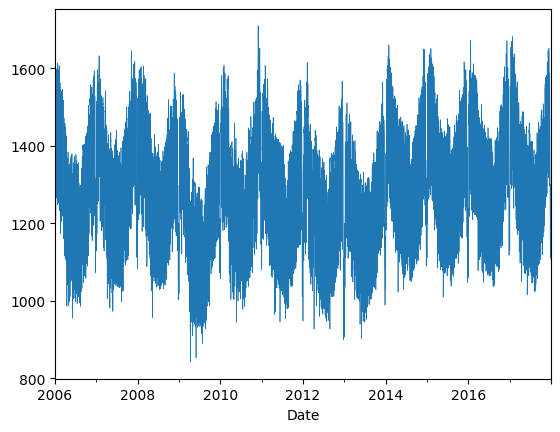

In [61]:
# Plot daily consumption data
opsd_daily['Consumption'].plot(linewidth=0.5)
plt.show()

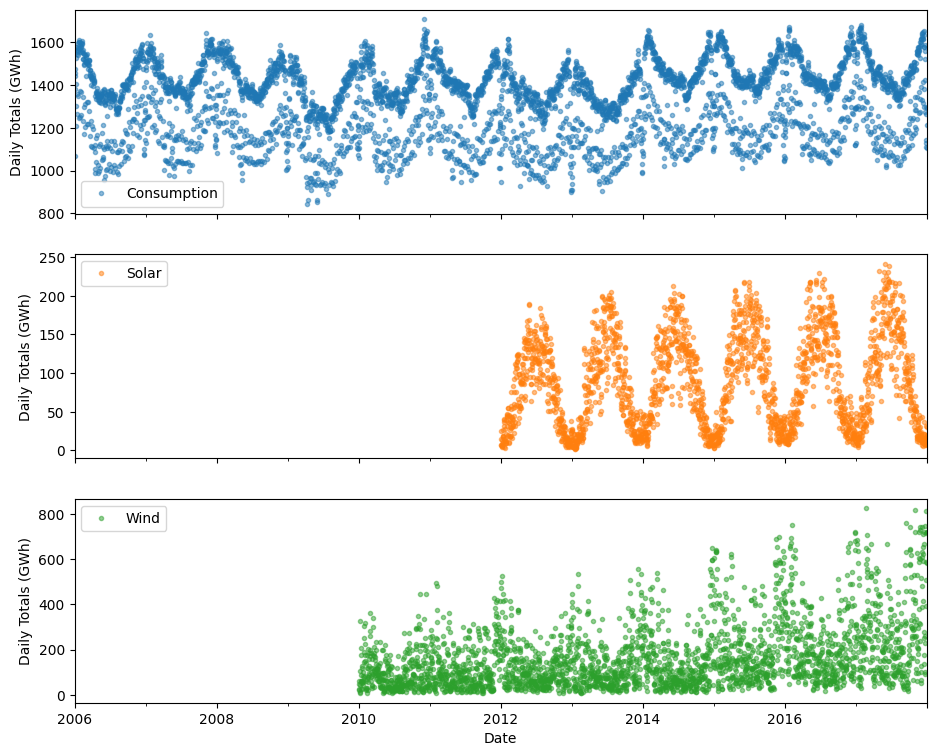

In [62]:


# Plot multiple columns
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = opsd_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')
plt.show()


Step 4: Seasonality

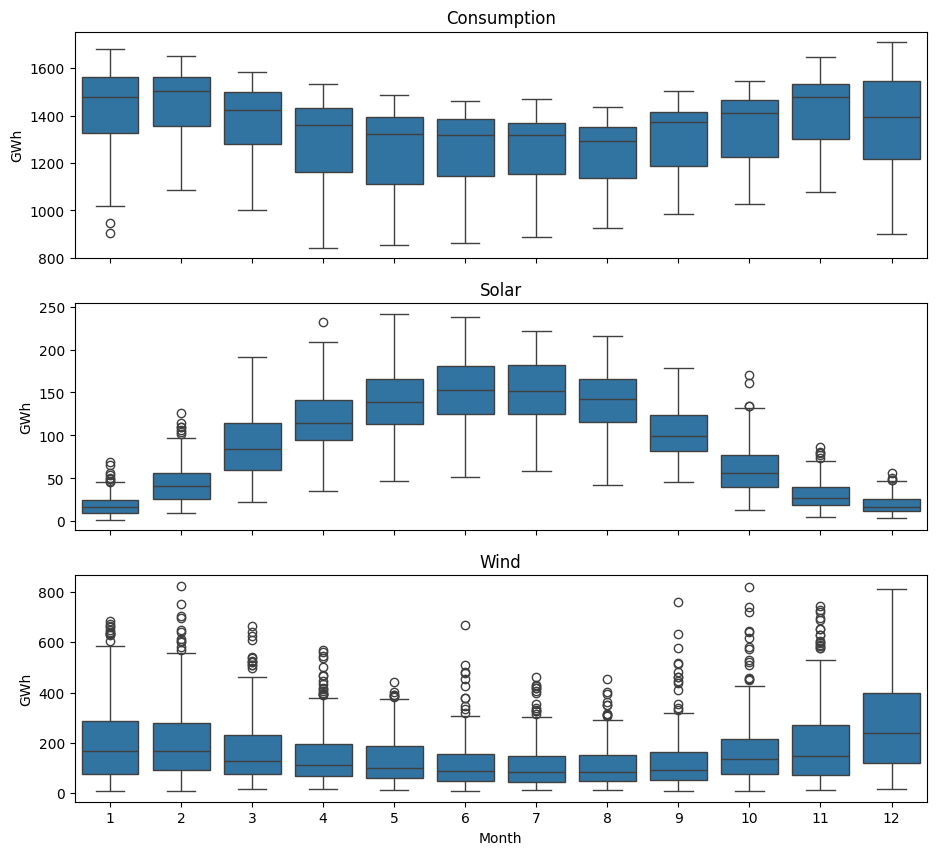

In [63]:
# Plot the seasonal distribution of Consumption, Solar, and Wind
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=opsd_daily, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
plt.show()


Step 5: Resampling

In [64]:
# Resample data to weekly frequency, aggregating with mean
opsd_weekly_mean = opsd_daily[['Consumption', 'Wind', 'Solar']].resample('W').mean()
opsd_weekly_mean.head()

,Consumption,Wind,Solar
Date,,,
2006-01-01,1069.184000,NaN,NaN
2006-01-08,1381.300143,NaN,NaN
2006-01-15,1486.730286,NaN,NaN
2006-01-22,1490.031143,NaN,NaN
2006-01-29,1514.176857,NaN,NaN


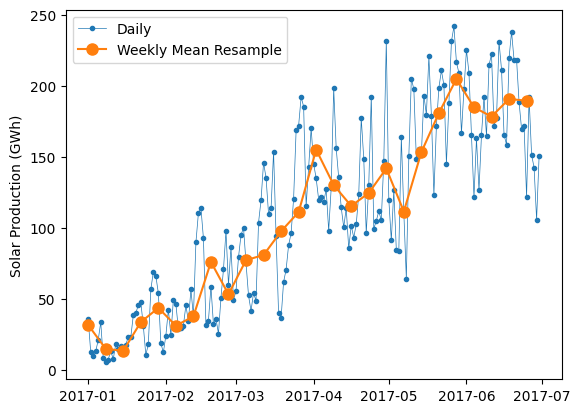

In [65]:
# Plot daily and weekly resampled time series
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc['2017-01':'2017-06', 'Solar'], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc['2017-01':'2017-06', 'Solar'], marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar Production (GWh)')
ax.legend()
plt.show()
